<a href="https://colab.research.google.com/github/ugokingz/skills-introduction-to-github/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression


In [1]:
#Importing the data set along with some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#The data set
df = pd.read_csv('toyotadata.csv')

In [3]:
#To visualize the dataset
df.head()

,date,open,high,low,close,adj_close,volume
0,NaN,TM,TM,TM,TM,TM,TM
1,1980-03-17,0.0,3.344743013381958,3.291227102279663,3.291227102279663,1.8489787578582764,41109
2,1980-03-18,0.0,3.3581221103668213,3.3046059608459473,3.3046059608459473,1.8564950227737427,9343
3,1980-03-19,3.3046059608459473,3.3046059608459473,3.3046059608459473,3.3046059608459473,1.8564950227737427,0
4,1980-03-20,0.0,3.3581221103668213,3.3046059608459473,3.3046059608459473,1.8564950227737427,10277


In [6]:
#Checking the shape of the dataset
print(f"The shape of the dataset is {df.shape[0]} rows and {df.shape[1]} columns")
#Displaying the type of the dataset
print(df.dtypes)
#Getting the summary of the dataset using descriptive statistics
print(df.describe().T)

The shape of the dataset is 11414 rows and 7 columns
date         object
open         object
high         object
low          object
close        object
adj_close    object
volume       object
dtype: object
           count unique                top  freq
date       11413  11413         2025-06-26     1
open       11414   4894                0.0  2981
high       11414   5798  7.317633152008057    37
low        11414   5787  7.228393077850342    36
close      11414   5950  7.228393077850342    36
adj_close  11414   7757  4.060840606689453    36
volume     11414   5826                  0   133


In [7]:
#checking for missing values in the dataset
df.isnull().sum()

,0
date,1
open,0
high,0
low,0
close,0
adj_close,0
volume,0


In [16]:
#To fill in the missing value in the date
df['date'] = df['date'].fillna(df['date'].mode()[0])


In [22]:
#Remove the first row and convert relevant columns to numeric types, then drop rows with NaN values
cols_to_convert = ['open', 'high', 'low', 'close', 'adj_close', 'volume']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(inplace=True)

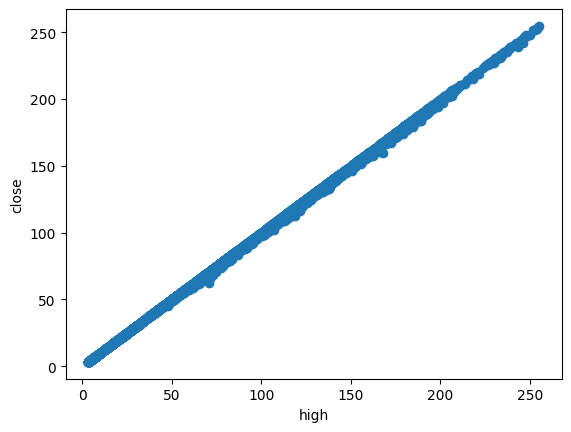

In [23]:
#To visualize the data by plotting for high price against closing value

plt.scatter(df['high'],df['close'])
plt.xlabel('high')
plt.ylabel('close')
plt.show()


Data Analysis Key Findings

The dataset was successfully cleaned by removing the first row and converting relevant columns ('open', 'high', 'low', 'close', 'adj_close', 'volume') to numeric types.
Rows with resulting missing values were dropped.

A linear regression plot was generated visualizing the relationship between the 'high' and 'close' columns.

Insight
The linear regression plot suggests a strong positive linear relationship between the daily high price and the closing price.

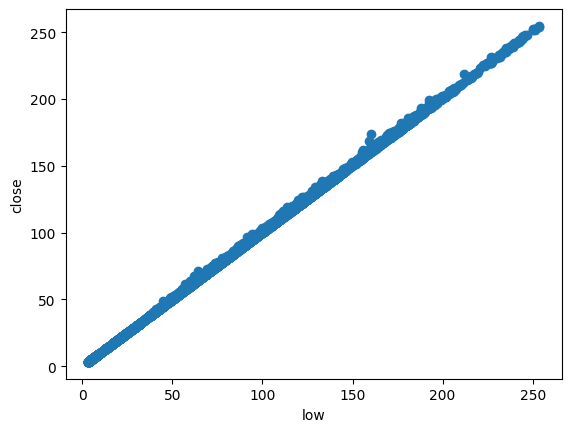

In [24]:
#To visualize the data by plotting for low price against closing value

plt.scatter(df['low'],df['close'])
plt.xlabel('low')
plt.ylabel('close')
plt.show()

Slope (m): 0.99
Intercept (c): -0.05


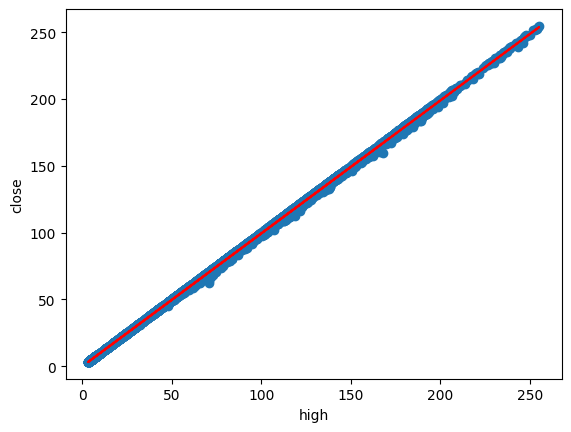

In [26]:
# Calculate the slope and intercept using numpy.polyfit
# polyfit with degree 1 fits a linear model (y = mx + c)
m, c = np.polyfit(df['high'], df['close'], 1)

# Output the slope and intercept
print(f"Slope (m): {m:.2f}")
print(f"Intercept (c): {c:.2f}")

# To visualize the data by plotting for high price against closing value and adding the regression line

plt.scatter(df['high'],df['close'])
plt.xlabel('high')
plt.ylabel('close')

# Generate the regression line
regression_line = np.poly1d([m, c])

# Plot the regression line
plt.plot(df['high'], regression_line(df['high']), color='red')

plt.show()

Evaluating the model


In [29]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict the closing values using the calculated slope and intercept
predicted_close = m * df['high'] + c

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(df['close'], predicted_close)

# Calculate the R-squared score
r2 = r2_score(df['close'], predicted_close)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 0.26
R-squared (R2): 1.00
